In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

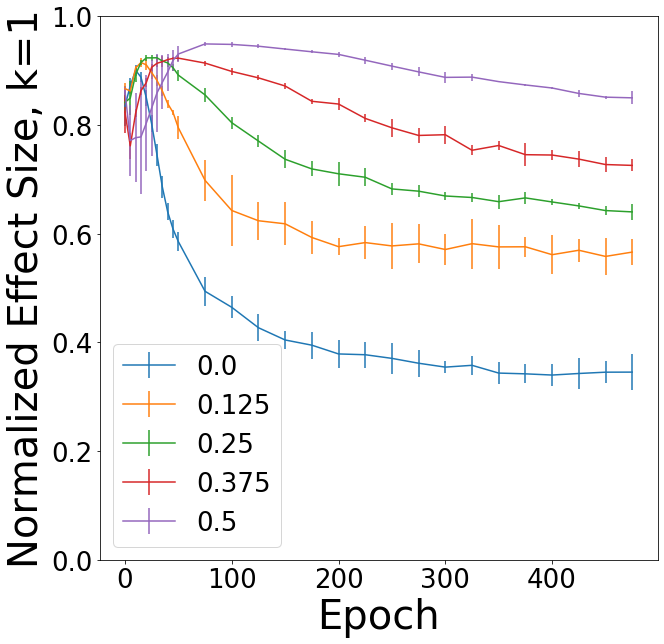

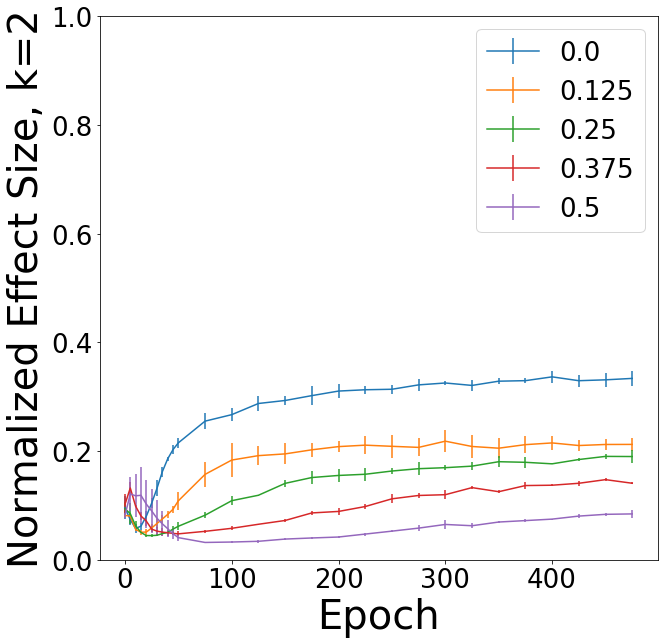

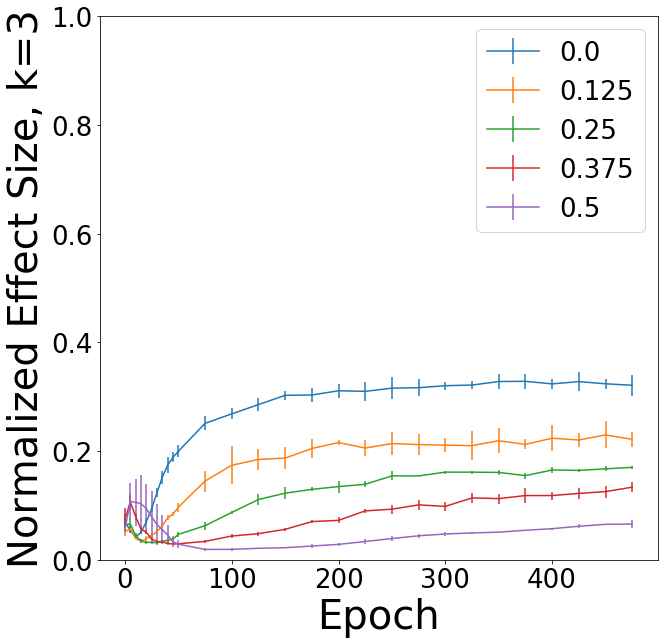

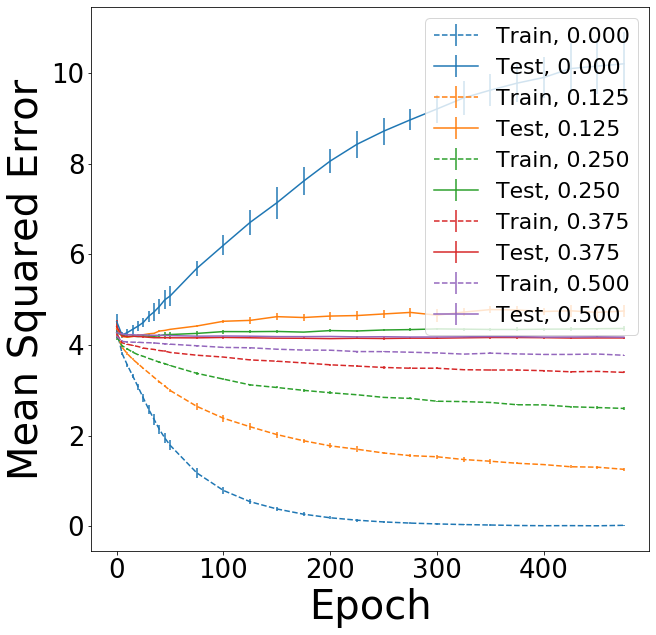

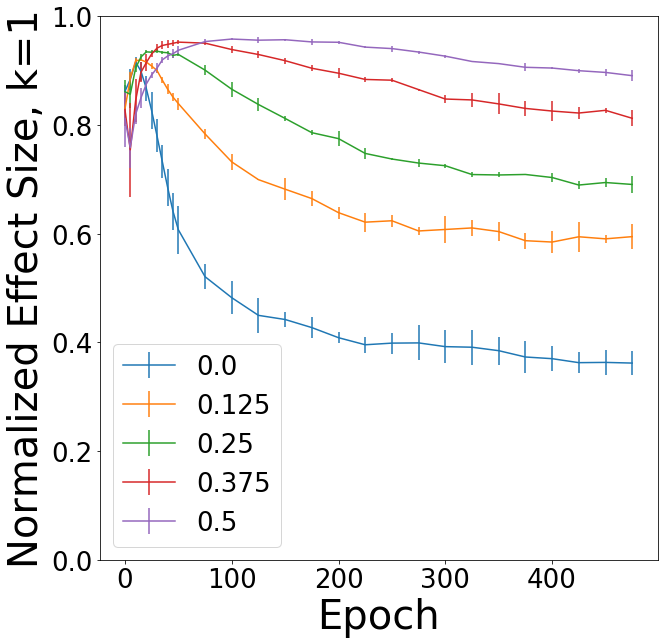

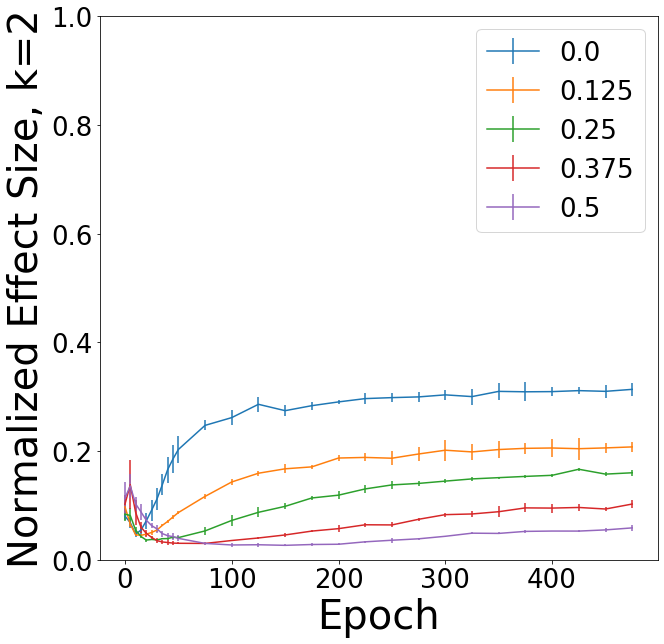

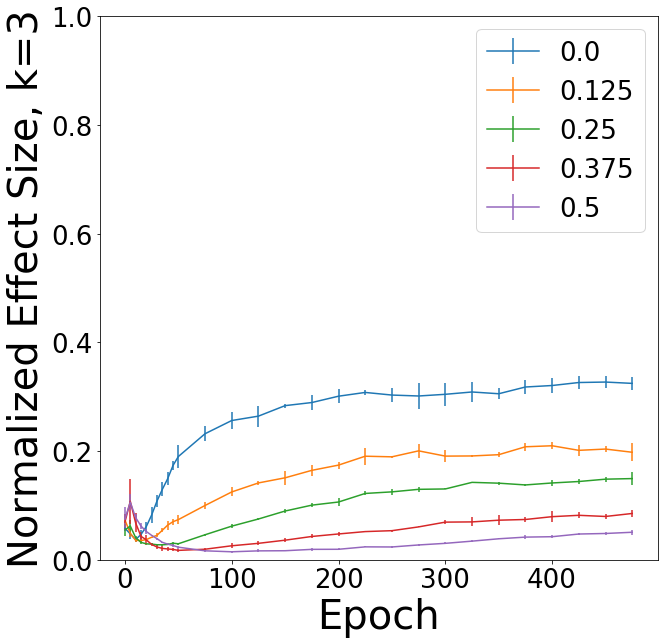

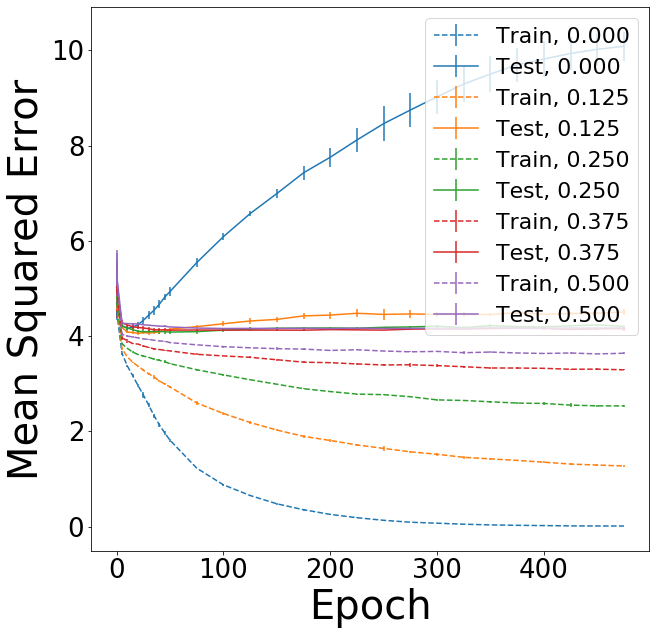

In [21]:
df = pd.read_csv("results/results_over_epoch_500.tsv", sep='\t', header=None)
vals = df.values

# Plot main 
vals.shape
epoch_labels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475]

for dataset_iter in sorted(set(vals[:, 0])):
    for add_amount in sorted(set(vals[:, 1])):
        fig = plt.figure(figsize=(10, 10))
        for dropout_p in sorted(set(vals[:, 2])):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 5] / (vals[i,  5] + vals[i,6] + vals[i, 7])
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                     yerr=np.std(my_results, axis=0), label=dropout_p)
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Normalized Effect Size, k=1", fontsize=40)
        lgd = plt.legend(fontsize=26)#, loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.ylim([0, 1])
        plt.savefig("results/final_over_epochs_mains_{}_mains.pdf".format(add_amount),
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])
        
        fig = plt.figure(figsize=(10, 10))
        for dropout_p in sorted(set(vals[:, 2])):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 6] / (vals[i,  5] + vals[i,6] + vals[i, 7])
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                     yerr=np.std(my_results, axis=0), label=dropout_p)
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Normalized Effect Size, k=2", fontsize=40)
        lgd = plt.legend(fontsize=26)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.ylim([0, 1])
        plt.savefig("results/final_over_epochs_mains_{}_pairs.pdf".format(add_amount),
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])
        
        fig = plt.figure(figsize=(10, 10))
        for dropout_p in sorted(set(vals[:, 2])):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 7] / (vals[i,  5] + vals[i,6] + vals[i, 7])
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                         yerr=np.std(my_results, axis=0), label=dropout_p)
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Normalized Effect Size, k=3", fontsize=40)
        lgd = plt.legend(fontsize=26)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.ylim([0, 1])
        plt.savefig("results/final_over_epochs_mains_{}_threes.pdf".format(add_amount),
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])
        
        # Plot accuracy
        fig = plt.figure(figsize=(10, 10))
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        for j, dropout_p in enumerate(sorted(set(vals[:, 2]))):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 8] # train_mse
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                         yerr=np.std(my_results, axis=0), label="Train, {:.3f}".format(dropout_p),
                        linestyle='--', color=colors[j])
            
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 9] # test_mse
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                         yerr=np.std(my_results, axis=0), label="Test, {:.3f}".format(dropout_p),
                         color=colors[j])
            
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Mean Squared Error", fontsize=40)
        lgd = plt.legend(fontsize=22)#, loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.savefig("results/final_over_epochs_mains_{}_mses.pdf".format(add_amount),
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])

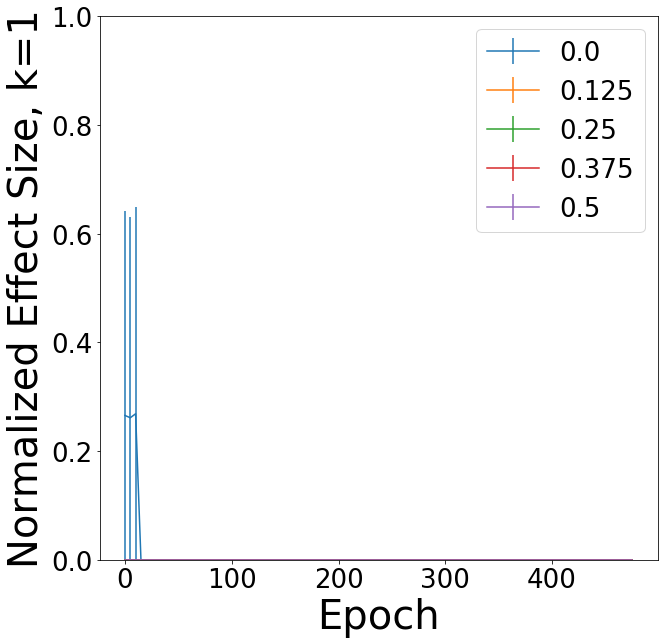

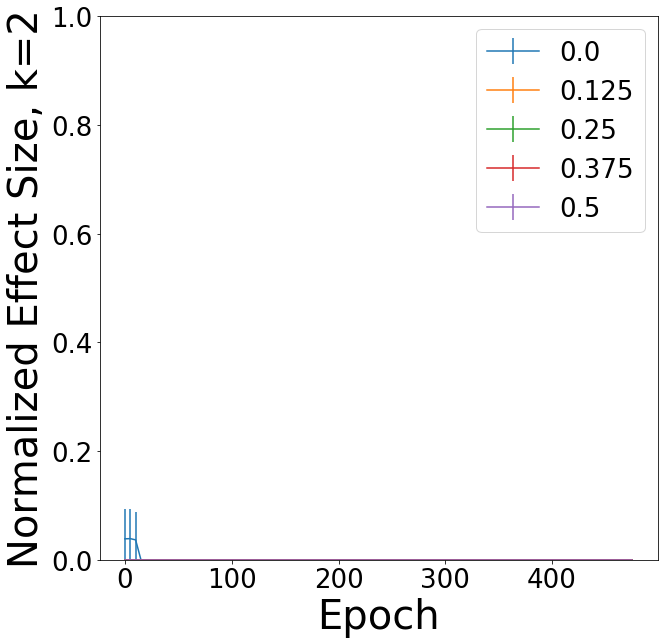

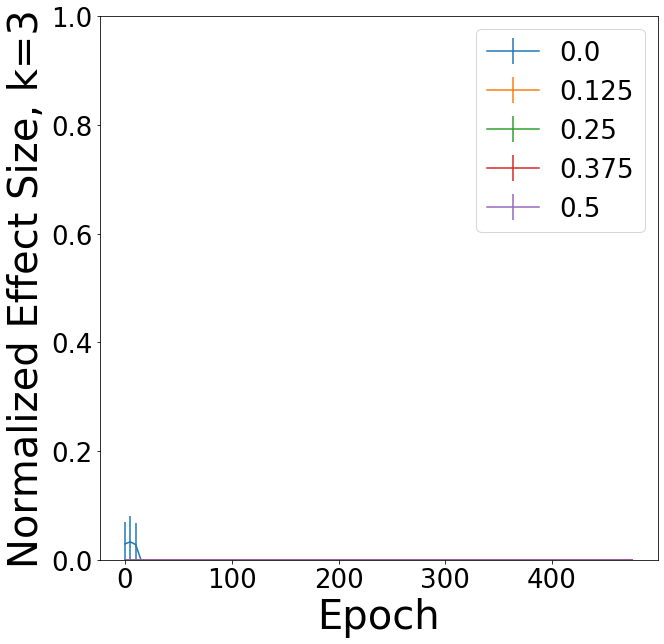

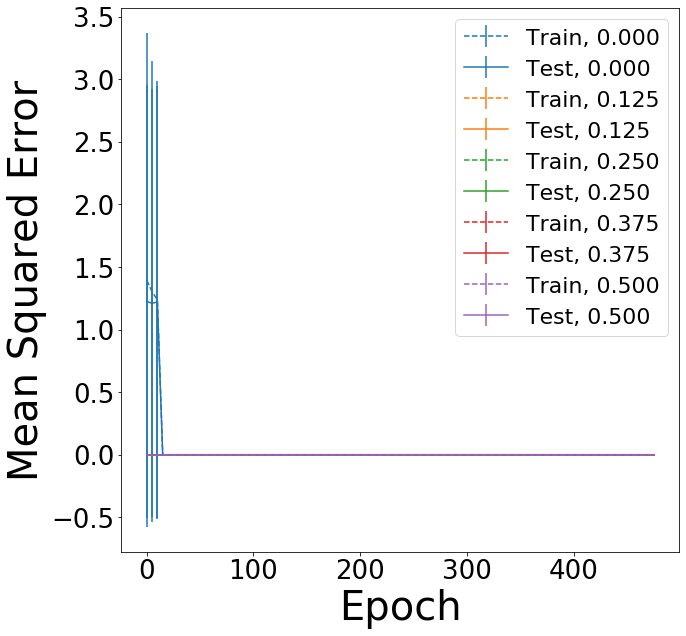

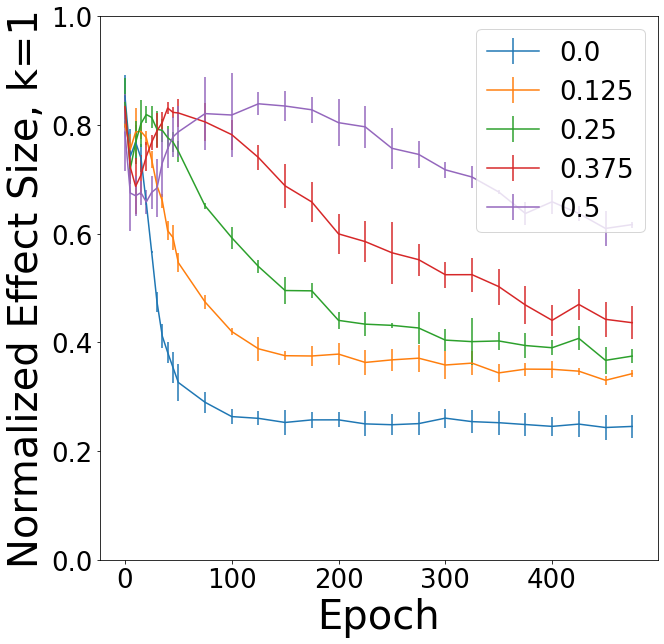

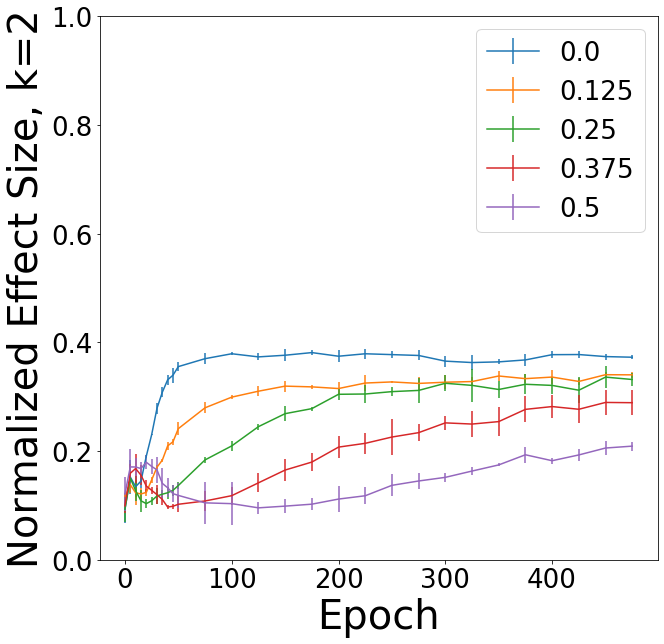

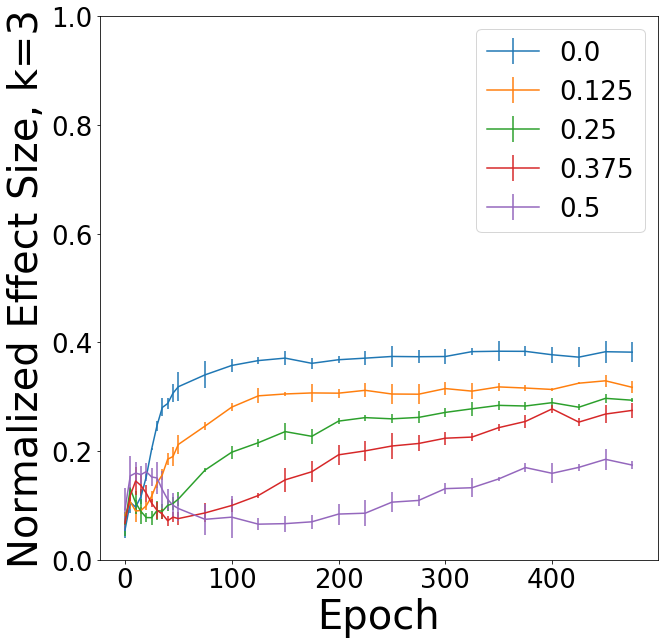

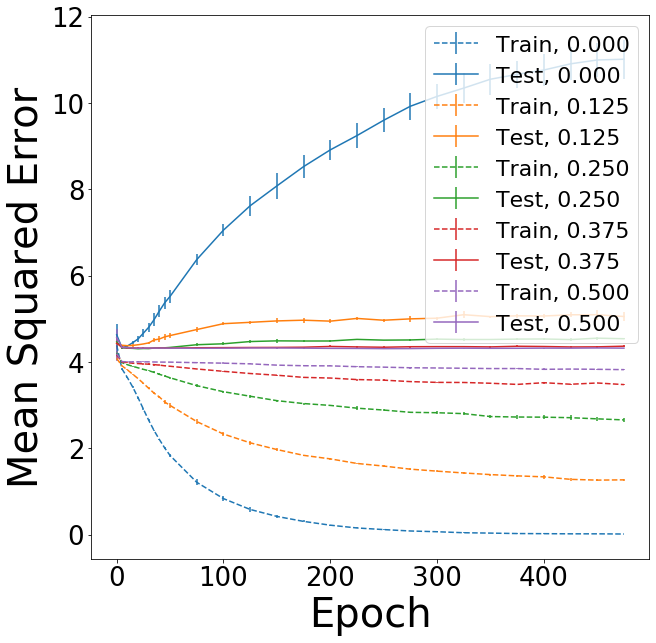

In [13]:
# Plot for a true 3-way effect.
df = pd.read_csv("results/results_over_epoch_500_three.tsv", sep='\t', header=None)
vals = df.values

# Plot main 
vals.shape
epoch_labels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475]

for dataset_iter in sorted(set(vals[:, 0])):
    for add_amount in sorted(set(vals[:, 1])):
        fig = plt.figure(figsize=(10, 10))
        for dropout_p in sorted(set(vals[:, 2])):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 5] / (vals[i,  5] + vals[i,6] + vals[i, 7])
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                     yerr=np.std(my_results, axis=0), label=dropout_p)
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Normalized Effect Size, k=1", fontsize=40)
        lgd = plt.legend(fontsize=26)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.ylim([0, 1])
        plt.savefig("results/over_epochs_threes_mains.pdf",
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])
        
        fig = plt.figure(figsize=(10, 10))
        for dropout_p in sorted(set(vals[:, 2])):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 6] / (vals[i,  5] + vals[i,6] + vals[i, 7])
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                     yerr=np.std(my_results, axis=0), label=dropout_p)
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Normalized Effect Size, k=2", fontsize=40)
        lgd = plt.legend(fontsize=26)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.ylim([0, 1])
        plt.savefig("results/over_epochs_threes_pairs.pdf",
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])
        
        fig = plt.figure(figsize=(10, 10))
        for dropout_p in sorted(set(vals[:, 2])):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 7] / (vals[i,  5] + vals[i,6] + vals[i, 7])
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                         yerr=np.std(my_results, axis=0), label=dropout_p)
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Normalized Effect Size, k=3", fontsize=40)
        lgd = plt.legend(fontsize=26)#, loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.ylim([0, 1])
        plt.savefig("results/over_epochs_threes_threes.pdf",
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])
        
        # Plot accuracy
        fig = plt.figure(figsize=(10, 10))
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        for j, dropout_p in enumerate(sorted(set(vals[:, 2]))):
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 8] # train_mse
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                         yerr=np.std(my_results, axis=0), label="Train, {:.3f}".format(dropout_p),
                        linestyle='--', color=colors[j])
            
            my_results = np.zeros((3, len(epoch_labels))) # n_fit_iters x epochs
            for i in range(vals.shape[0]):
                if vals[i, 0] == dataset_iter and vals[i, 1] == add_amount and vals[i, 2] == dropout_p:
                    epoch_idx = epoch_labels.index(vals[i, 4])
                    my_results[int(vals[i, 3]), epoch_idx] = vals[i, 9] # test_mse
            plt.errorbar(epoch_labels, np.mean(my_results, axis=0), 
                         yerr=np.std(my_results, axis=0), label="Test, {:.3f}".format(dropout_p),
                         color=colors[j])
            
        plt.xlabel("Epoch", fontsize=40)
        plt.ylabel("Mean Squared Error", fontsize=40)
        lgd = plt.legend(fontsize=22)
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.savefig("results/over_epochs_threes_mses.pdf",
                    dpi=300, bbox_inches='tight', bbox_artists=[lgd])